In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

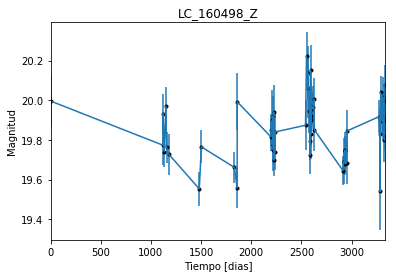

In [2]:
data = np.genfromtxt('LC_160498_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_160498_Z')
plt.savefig("LC_160498_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

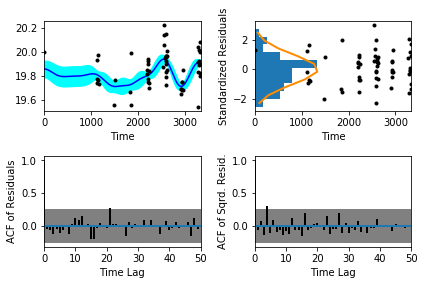

In [5]:
sample.assess_fit()

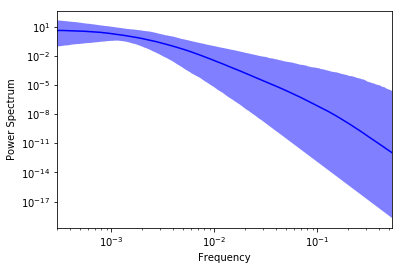

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

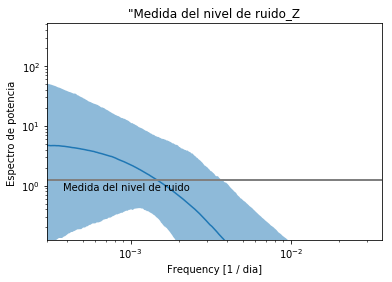

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_160498_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_160498_Z')

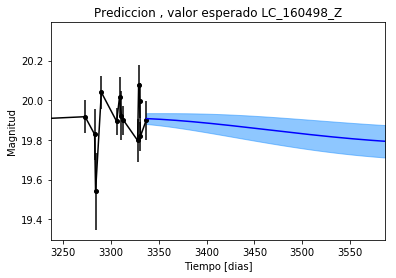

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_160498_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_160498_Z')

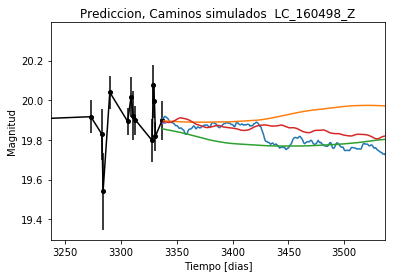

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_160498_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


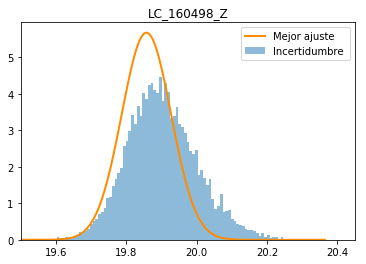

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_160498_Z')
plt.savefig("Mejor_ajuste_LC_160498_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_160498_Z')

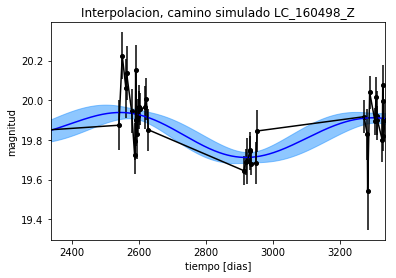

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_160498_Z')

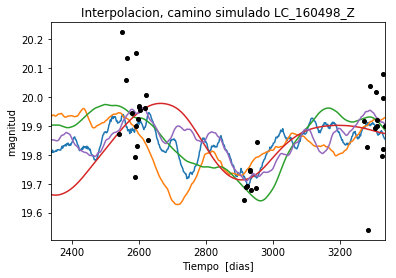

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_160498_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 394.978007486
Median: 0.0105625745439
Standard deviation: 0.20622787075
68% credibility interval: [ 0.00077591  0.22283936]
95% credibility interval: [  3.49824270e-04   7.93635877e-01]
99% credibility interval: [  3.07306248e-04   1.00369382e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 18107.9553731
Median: 0.00168132247205
Standard deviation: 0.0713650186182
68% credibility interval: [ 0.00050124  0.02010184]
95% credibility interval: [ 0.0003238   0.21636382]
99% credibility interval: [  3.03947210e-04   5.03175034e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 597.343687817
Median: 0.0139990007595
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1442.07136925
Median: 69.1532994617
Standard deviation: 1.58450701137
68% credibility interval: [ 67.41449286  70.28510592]
95% credibility interval: [ 64.91576211  71.01024779]
99% credibility interval: [ 62.88174376  71.33151164]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 300.411506191
Median: 0.551239022802
Standard deviation: 2.30870221411
68% credibility interval: [ 0.06014316  3.6717839 ]
95% credibility interval: [ 0.01398575  7.6569349 ]
99% credibility interval: [  1.03112121e-02   1.12277546e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 618.954119309
Median: 0.18657978743
Standard deviation: 8.62971502032
68% credibility interval: [ 0.00667177  5.53565448]
95% credibility interval: [  5.03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1859.79584792
Median: 9.02964546126e-26
Standard deviation: 6.40226574477e+110
68% credibility interval: [  5.41203175e-85   1.48008175e+04]
95% credibility interval: [  2.19591795e-153   1.56684404e+098]
99% credibility interval: [  6.14762793e-170   3.33327653e+101]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2244.81398569
Median: 19.816197952
Standard deviation: 0.0663743897689
68% credibility interval: [ 19.77015657  19.86919984]
95% credibility interval: [ 19.69693991  19.965537  ]
99% credibility interval: [ 19.61045997  20.05870823]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 473.966624762
Median: 0.00186698973574
Standard deviation: 0.207914877702
68% credibility interval: [ 0.          0.22206795]
95% credibility interval: [ 0.          0.80946289]
99% credibility interval: [ 0.         0.9945194]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 473.966624762
Median: 0.00186698973574
Standard deviation: 0.207914877702
68% credibility interval: [ 0.          0.22206795]
95% credibility interval: [ 0.          0.80946289]
99% credibility interval: [ 0.         0.9945194]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 648.705705163
Median: 0.0
Standard deviation: 0.000804471786863
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1442.07136925
Median: 69.1532994617
Standard deviation: 1.58450701137
68% credibility interval: [ 67.41449286  70.28510592]
95% credibility interval: [ 64.91576211  71.01024779]
99% credibility interval: [ 62.88174376  71.33151164]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1750.60549217
Median: 0.0149179687472
Standard deviation: 0.0282943518786
68% credibility interval: [ 0.00742017  0.03204984]
95% credibility interval: [ 0.00393357  0.08195731]
99% credibility interval: [ 0.00269308  0.16449298]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2715.88333674
Median: 1.0937785169
Standard deviation: 0.162202515944
68% credibility interval: [ 0.94781296  1.26119445]
95% credibility interval: [ 0.83154166  1.47202753]
99% credibility interval: [ 0.75977174  1.60594426]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 425.939671672
Median: 2.4697882122e-05
Standard deviation: 0.0985667080024
68% credibility interval: [  1.54656817e-09   2.32653610e-03]
95% credibility interval: [  2.07957156e-102   1.17644541e-001]
99% credibility interval: [  6.23689501e-106   7.44037734e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 394.978007486
Median: (-0.0663666131803+0j)
Standard deviation: 1.84000301676
68% credibility interval: [-1.40014100+0.j         -0.00487519-0.00481931j]
95% credibility interval: [ -4.98656128e+00+0.j          -2.19801072e-03-0.07012361j]
99% credibility interval: [ -6.30639423e+00+0.j          -1.93086210e-03-0.01000559j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 18107.9553731
Median: (-0.010564060653+0j)
Standard deviation: 1.38118022499
68% credibility interval: [-0.12630359+2.48036534j -0.00314935+0.j        ]
95% credibility interval: [-1.35945400+2.93443792j -0.00203447+0.j        ]
99% credibility interval: [ -3.16154198e+00+2.24476095j  -1.90975665e-03+0.j        ]
Posterior summary for parameter ar_root